# Load All Bike Data (Trips/Stations)
## Handle null values and convert to proper data types

In [8]:
import pandas as pd
import glob
import os

### Get All Bike Trips Data ###
# Get all CSV files from both the 2023 and 2024 folders
csv_files = glob.glob('raw_data/bikeshare-ridership-*/Bike share ridership *.csv')

# Read and combine all files
df_list = []
for file in csv_files:
    print(f"Reading {file}...")
    df = pd.read_csv(file, encoding='cp1252')
    df_list.append(df)

Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-02.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-03.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-01.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-04.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-05.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-07.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-06.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-08.csv...
Reading raw_data/bikeshare-ridership-2024/Bike share ridership 2024-09.csv...
Reading raw_data/bikeshare-ridership-2023/Bike share ridership 2023-08.csv...
Reading raw_data/bikeshare-ridership-2023/Bike share ridership 2023-09.csv...
Reading raw_data/bikeshare-ridership-2023/Bike share ridership 2023-02.csv...
Reading raw_data/bikeshare-ridership-2023/Bike share ridership 2

In [11]:
### Clean Bike Trips Data ###
# Combine all dataframes
all_trips_df = pd.concat(df_list, ignore_index=True)

# Combine two versions of Trip IDs into a single column and drop the original columns
all_trips_df['Trip Id'] = all_trips_df['Trip Id'].combine_first(all_trips_df['ï»¿Trip Id']).convert_dtypes()
all_trips_df.drop(columns=['Model', 'ï»¿Trip Id'], inplace=True)

# Drop rows where both End Station ID and End Station Name are missing
all_trips_df = all_trips_df.dropna(subset=['End Station Id', 'End Station Name'], how='all')

# Convert Timestamps into Datetime object with localization
all_trips_df['Start Time'] = pd.to_datetime(all_trips_df['Start Time']).dt.tz_localize('EST')
all_trips_df['End Time'] = pd.to_datetime(all_trips_df['End Time']).dt.tz_localize('EST')

# Convert columns into proper data types
all_trips_df['Start Station Id'] = all_trips_df['Start Station Id'].convert_dtypes()
all_trips_df['End Station Id'] = all_trips_df['End Station Id'].convert_dtypes()
all_trips_df['Trip Duration'] = all_trips_df['Trip  Duration'].convert_dtypes()
all_trips_df = all_trips_df.drop(columns=['Trip  Duration'])

print(f"\nCombined {len(csv_files)} files")
print(f"Total rows: {len(all_trips_df)}")
print(f"Columns: {all_trips_df.columns.tolist()}")

all_trips_df.info()
all_trips_df.isnull().sum()


Combined 21 files
Total rows: 11052490
Columns: ['Trip Id', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type', 'Trip Duration']
<class 'pandas.core.frame.DataFrame'>
Index: 11052490 entries, 0 to 11055528
Data columns (total 10 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Trip Id             Int64              
 1   Start Station Id    Int64              
 2   Start Time          datetime64[ns, EST]
 3   Start Station Name  object             
 4   End Station Id      Int64              
 5   End Time            datetime64[ns, EST]
 6   End Station Name    object             
 7   Bike Id             int64              
 8   User Type           object             
 9   Trip Duration       Int64              
dtypes: Int64(4), datetime64[ns, EST](2), int64(1), object(3)
memory usage: 969.7+ MB


Trip Id                    0
Start Station Id           0
Start Time                 0
Start Station Name    707683
End Station Id             0
End Time                   0
End Station Name      710366
Bike Id                    0
User Type                  0
Trip Duration              0
dtype: int64

# Load all Bike Stations Data

In [3]:
### Get bike stations data ###
stations_df = pd.read_csv('raw_data/bike_stations.csv', encoding='utf-8')
stations_df = stations_df.drop(columns=['physical_configuration'])

print(stations_df.head())
stations_df.isnull().sum()

   station_id                          name        lat        lon  capacity  \
0        7000  Fort York  Blvd / Capreol Ct  43.639832 -79.395954        47   
1        7001     Wellesley Station Green P  43.664964 -79.383550        23   
2        7002    St. George St / Bloor St W  43.667131 -79.399555        19   
3        7003      Madison Ave / Bloor St W  43.667018 -79.402796        15   
4        7005           King St W / York St  43.648001 -79.383177        26   

                        address  is_charging_station  nearby_distance  
0  Fort York  Blvd / Capreol Ct                False            500.0  
1             Yonge / Wellesley                 True            500.0  
2    St. George St / Bloor St W                False            500.0  
3      Madison Ave / Bloor St W                False            500.0  
4           King St W / York St                False            500.0  


station_id             0
name                   0
lat                    0
lon                    0
capacity               0
address                1
is_charging_station    0
nearby_distance        0
dtype: int64

In [4]:
# Quick comparison for missing stations IDs compared to trips data
stations_ids = set(stations_df['station_id'])
all_trip_station_ids = set(all_trips_df['Start Station Id'].dropna()) | set(all_trips_df['End Station Id'].dropna())

missing = all_trip_station_ids - stations_ids
print(f"Stations in trips missing from stations_df: {len(missing)}")
print(missing)

Stations in trips missing from stations_df: 67
{7424, 7683, 7686, 7689, 7690, 7180, 7949, 7823, 7056, 7440, 7062, 7323, 7067, 7327, 7072, 7328, 7585, 7586, 7713, 7463, 7723, 7980, 7725, 7726, 7472, 7092, 7869, 7873, 7491, 7108, 7621, 7876, 7879, 7369, 7882, 7756, 7245, 7758, 7886, 7634, 7251, 7763, 7892, 7382, 7638, 7132, 7004, 7774, 7263, 7136, 7392, 7648, 7905, 7274, 7275, 7406, 7280, 7408, 7793, 7795, 7921, 7413, 7670, 7544, 7163, 7548, 7167}


In [5]:
# Create a simple station id -> name mapping
station_names = stations_df.set_index('station_id')['name'].to_dict()

# Fill in missing station names in all_trips_df
all_trips_df['Start Station Name'] = all_trips_df['Start Station Name'].fillna(
    all_trips_df['Start Station Id'].map(station_names)
)

all_trips_df['End Station Name'] = all_trips_df['End Station Name'].fillna(
    all_trips_df['End Station Id'].map(station_names)
)

# Check how many are filled
print(f"Start station nulls remaining: {all_trips_df['Start Station Name'].isnull().sum()}")
print(f"End station nulls remaining: {all_trips_df['End Station Name'].isnull().sum()}")

Start station nulls remaining: 51910
End station nulls remaining: 49570


<Axes: >

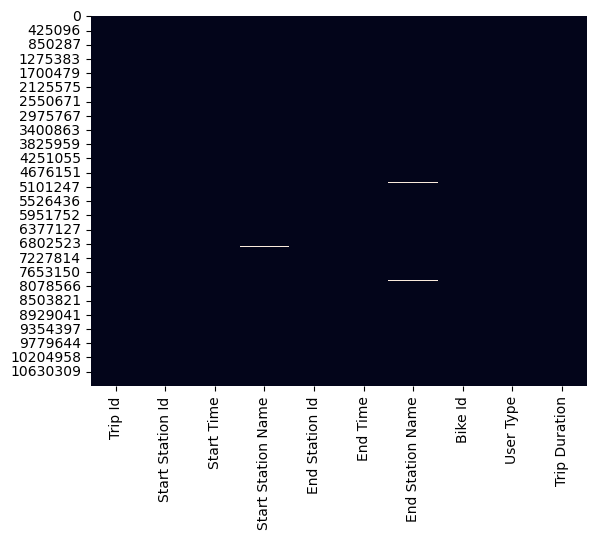

In [6]:
import seaborn as sns

sns.heatmap(all_trips_df.isnull(), cbar=False)

### Export processed versions of CSVs as new CSVs for exploration

In [7]:
all_trips_df.to_csv('all_bike_trips.csv', index=False)
stations_df.to_csv('all_bike_stations.csv', index=False)